# Exercises Week 7: Squared Exponential Kernel 

### Learning objectives

After completing this lab exercise, you should be able to:

- Implement the squared exponential kernel and explain the interpretation of each parameter
- Generate samples from a Gaussian process prior
- Compute the posterior & predictive distributions for a Gaussian process model with Gaussian likelihood


**Note:** All exercises must be solved using numpy only.

This assignment consists of 3 smaller tasks.

In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
import seaborn as snb
snb.set(font_scale=1.5)

### Task 1: The squared exponential kernel

The squared exponential covariance function is given by

\begin{align}
    k(\mathbf{x}_n, \mathbf{x}_m) = \alpha \exp\left(-\frac{\|\mathbf{x}_n - \mathbf{x}_m\|^2_ 2}{2\ell^2}\right),
\end{align}

where $\alpha > 0$ and $\ell > 0$ are hyperparameters of the kernel. This specific covariance function is perhaps the most common covariance function used in statistics and machine learning. It is also known as the radial basis function kernel, the gaussian kernel, or the exponeniated quadratic kernel. 

Below you are given a vector $\mathbf{X}^p \in \mathbb{R}^{N \times 1}$ of $N = 50$ points on the real line. The points are sorted and equidistantly distributed in the interval $\left[-3, 9\right]$. 

- **Task 1a**: Complete the implementation of the squared exponential kernel function below. (Hint: the code only needs to work with $D=1$).

- **Task 1b**: Use the kernel function to compute the $N\times N$ kernel matrix for the points $\mathbf{X}^p$ with $\alpha=1$ and $\ell=1$. These points will be used for predictions later and hence, the superscript 'p'. Visualize the kernel function as an image and give an interpretation of the structure of the kernel. ('imshow' function)

- **Task 1c**: Try few other parameter values $\alpha, \ell$ and explain how they affect the structure of the kernel.

In [7]:
# create an Nx1 vector of equidistant points in [-3, 3]
N = 50
Xp = np.linspace(-3, 9, N)[:, None]

# Task 1a
def create_se_kernel(X1, X2, alpha=1, scale=1):
    """ returns the NxM kernel matrix between the two sets of input X1 and X2 
    
    arguments:
    X1    -- NxD matrix
    X2    -- MxD matrix
    alpha -- scalar 
    scale -- scalar
    
    returns NxM matrix    
    """
    #print(np.sum(X1**2, axis=1)[:, np.newaxis].shape)
    #print(np.sum(X2**2, axis=1).shape)
    #dist_sq = np.sum(X1**2, axis=1)[:, np.newaxis] + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    dist_sq = np.sum((X1[:,None] - X2) **2, axis=2)
    
    kernel_matrix = alpha * np.exp(-dist_sq / (2 * (scale**2)))
    return kernel_matrix
    ###############################################
    # ------- insert code here -------------------
    ###############################################


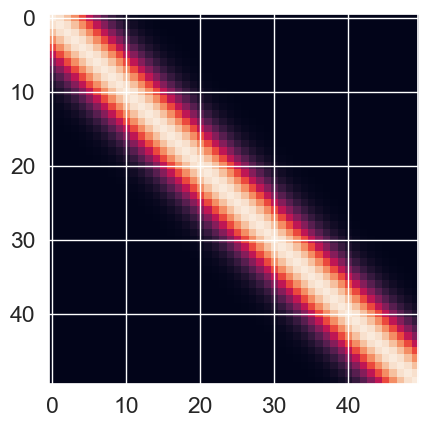

In [10]:
Kpp = create_se_kernel(Xp, Xp)
plt.imshow(Kpp)

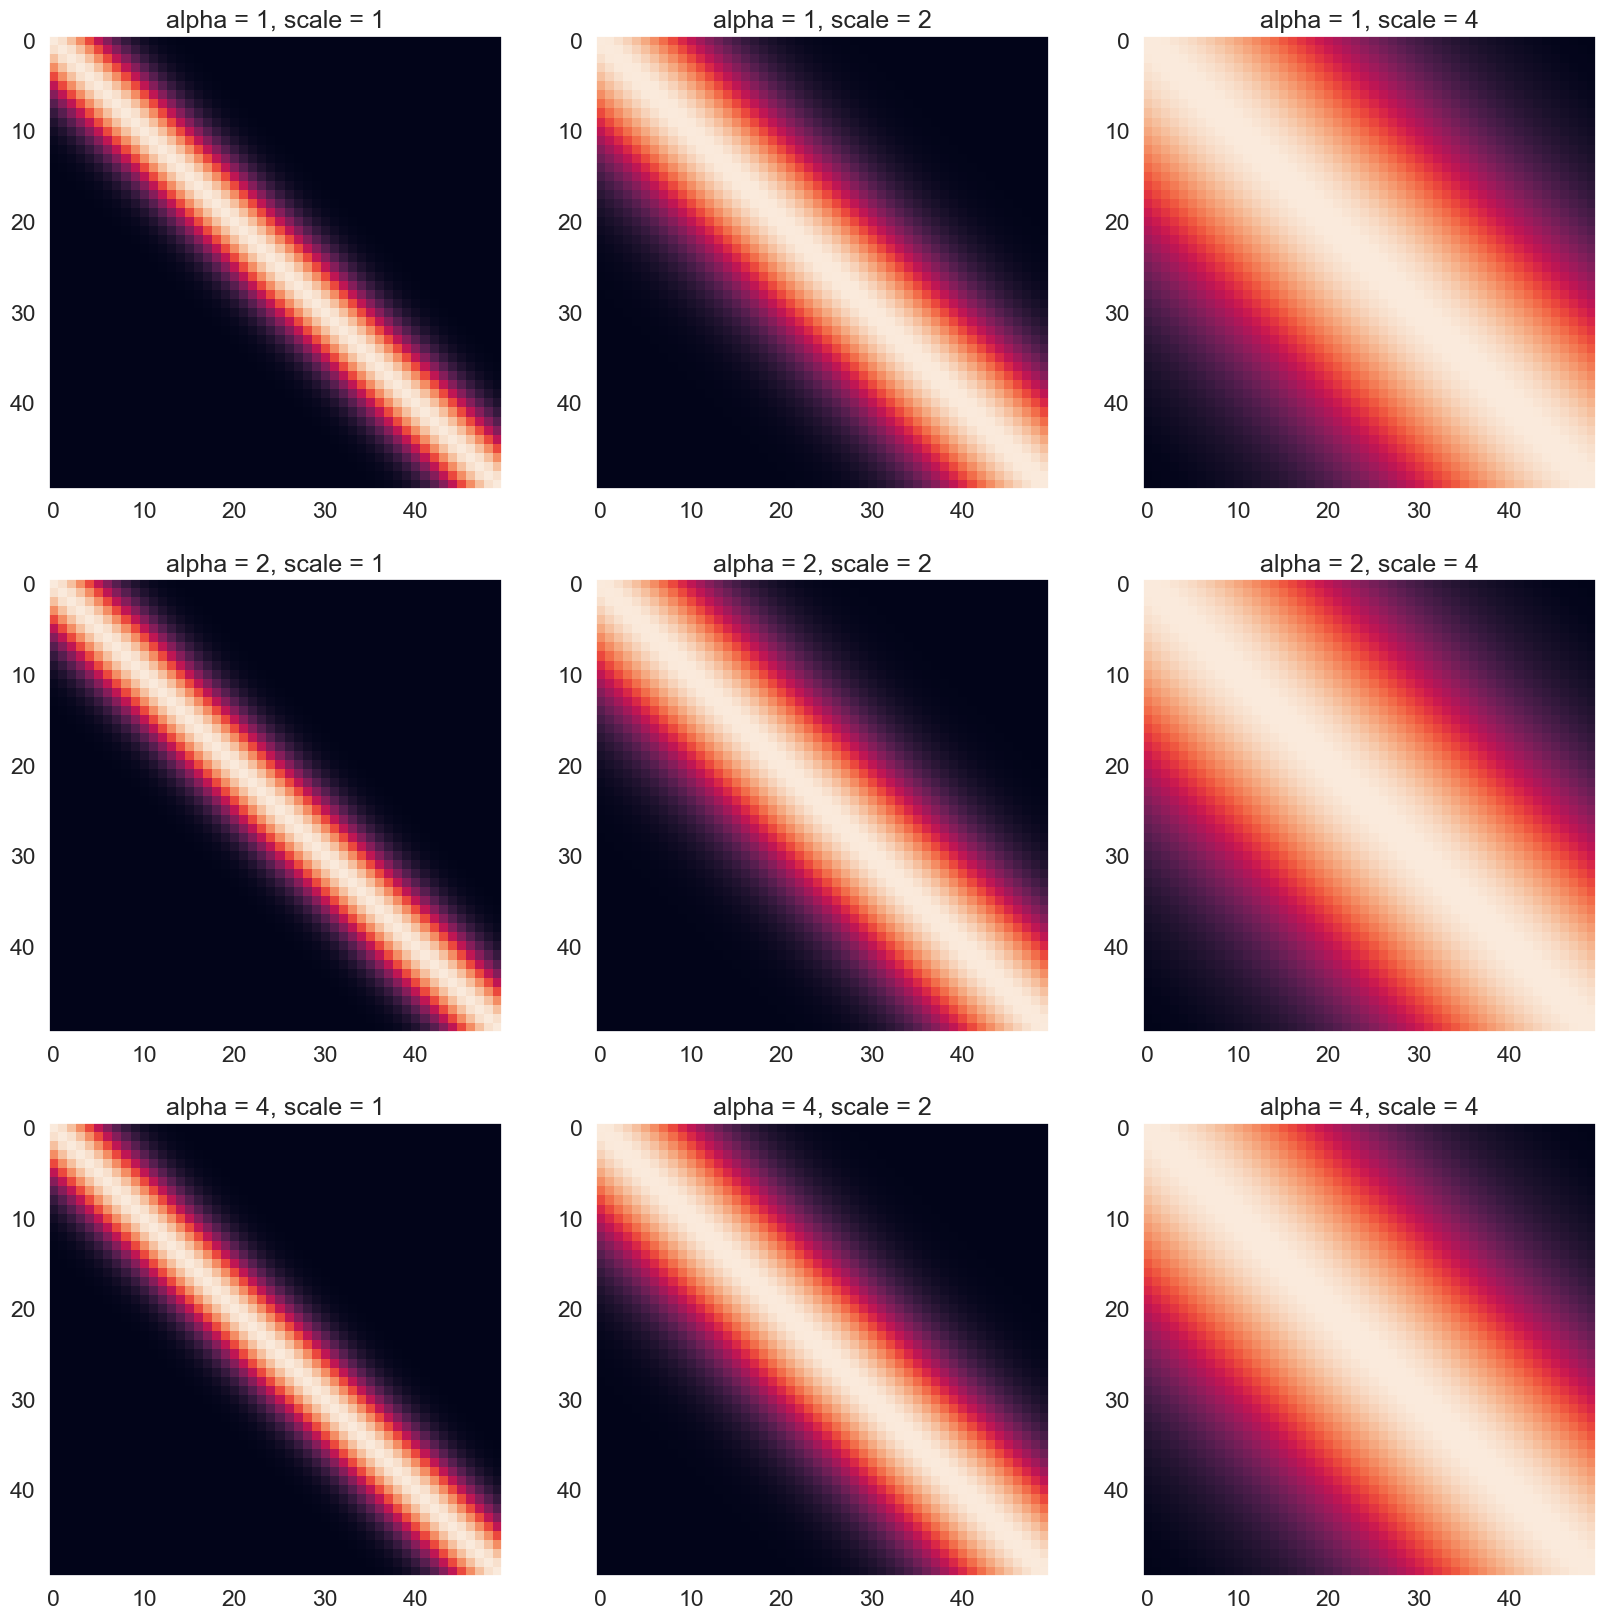

In [11]:
# Task 1c
fig,ax=plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
alphas = [1, 2, 4]
scales = [1, 2, 4]

X1, X2 = np.meshgrid(Xp, Xp)

for indexAlpha, alpha in enumerate(alphas):
    for indexScale, scale in enumerate(scales):
        K = create_se_kernel(Xp, Xp, alpha, scale)
        cp = ax[indexAlpha][indexScale].imshow(K, interpolation='None')
        ax[indexAlpha][indexScale].grid(False)
        ax[indexAlpha][indexScale].set_title(f"alpha = {alpha}, scale = {scale}")
        #fig.colorbar(cp) # Add a colorbar to a plot

### Task 2: Sampling from a Gaussian process

We will consider a zero-mean Gaussian process prior for functions of the form $f: \mathbb{R} \rightarrow \mathbb{R}$ using the squared exponential kernel from task 1). That is,

\begin{align}
f(x) \sim \mathcal{GP}\left(0 \, , \, k\left(x, x'\right)\right).
\end{align}

Let $f_n = f(x_n) \in \mathbb{R}$ be the value of the function $f$ evaluated at a point $x_n \in \mathbb{R}$. Furthermore, let $\mathbf{f} = \left[f_1, f_2, \dots, f_N\right] \in \mathbb{R}^{N \times 1}$ be the vector of function values for each of the points of $\mathbf{X}^p$ from task 1. 

The Gaussian process prior for $\mathbf{f}$ becomes

\begin{align}
\mathbf{f} \sim \mathcal{N}\left(\mathbf{0}, \mathbf{K}\right),
\end{align}

where $\mathbf{K}$ is the kernel matrix you generated previously.

- **Task 2a**: Complete the implementation of the sampling function given below. Hint: You can re-use the code from first exercise.
- **Task 2b**: Generate $M = 10$ samples using the new function and plot them
- **Task 2c**: Change the parameters $\alpha, \ell$ and explain how they affect the generated samples.


In [12]:
# Task 2a

def generate_samples(mean, K, M):
    """ returns M samples from a zero-mean Gaussian process with kernel matrix K
    
    arguments:
    K   -- NxN kernel matrix
    M   -- number of samples (scalar)
    
    returns NxM matrix
    """
    jitter = 1e-8
    L = np.linalg.cholesky(K + jitter * np.identity(len(K)))
    zs = np.random.normal(0, 1, size=(len(K), M))
    fs = mean + np.dot(L, zs)
    return fs
    ###############################################
    # ------- insert code here -------------------
    ###############################################

The sample shape is
(50, 10)


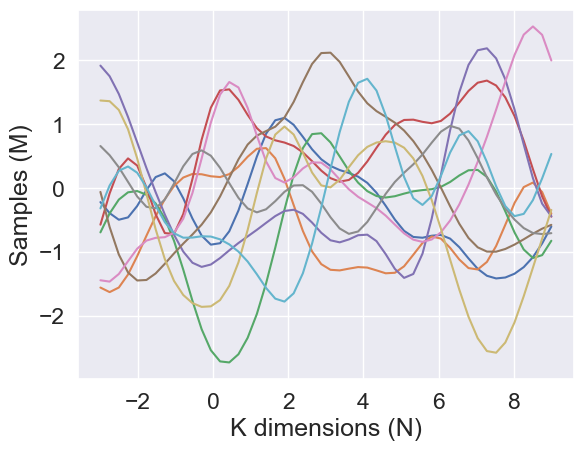

In [13]:
# Task 2b

# Number of samples
M = 10
# The mean vector
mean = np.zeros(M)

Kpp = create_se_kernel(Xp, Xp, alpha=1, scale=1)
samples = generate_samples(mean, Kpp, M)

print("The sample shape is")
print(samples.shape)

plt.plot(Xp, samples)

# Plotting the samples
plt.ylabel('Samples (M)')
plt.xlabel('K dimensions (N)')
# Show the plot
plt.show()

### Task 3: The analytical posterior distribution

The goal of this task is complete the implementation of the function below for computing the analytical posterior distribution for a Gaussian process model with Gaussian likelihood, respectively, using the squared exponential kernel.

The joint model for the training data is as follows:
\begin{align}
p(\mathbf{y}, \mathbf{f}) = \mathcal{N}\left(\mathbf{y}|\mathbf{f}, \sigma^2 \mathbf{I}\right)\mathcal{N}\left(\mathbf{f} | \mathbf{0}, \mathbf{K}\right)
\end{align}





Below you are given a simple toy data set $\mathcal{D} = \left\lbrace x_i, y_i \right\rbrace_{i=1}^N$ for $N = 50$ as visualized below


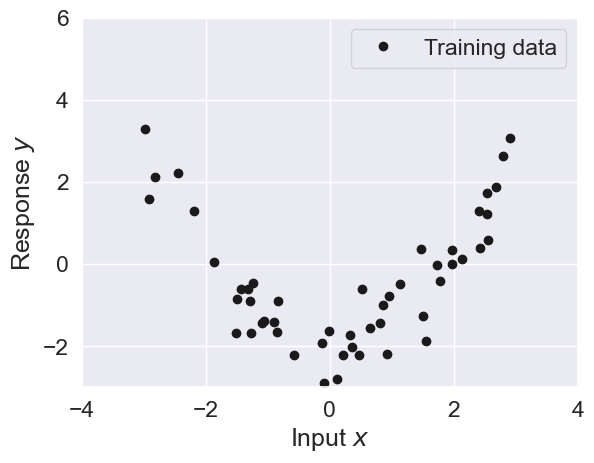

In [4]:
# load data
data = np.load('./Data/task_3_data.npz')
N = data['N']
X = data['X']
y = data['y']

plt.plot(X, y, 'k.', markersize=12, label='Training data')
plt.grid(True)
plt.xlim((-4, 4))
plt.ylim((-3, 6))
plt.xlabel('Input $x$')
plt.ylabel('Response $y$')
plt.legend();


**Task 3a**: Complete the implementation of the function <tt>posterior</tt> that computes the posterior

\begin{align*}
p(f_* | X,y,X^p) = \mathcal{N} \left(f_* \big| K_{f_* f} (K_{ff} + \sigma^2)^{-1} y, K_{f_* f_*} - K_{f_* f} (K_{ff} + \sigma^2)^{-1} K_{f_* f}^T \right)
\end{align*}


In [5]:
def posterior(Xp, X, y, alpha, scale, sigma2):
    """ returns the posterior distribution of f evaluated at each of the points in Xp conditioned on (X, y)
        using the squared exponential kernel.
    
    Arguments:
    Xp    -- PxD prediction points
    X     -- NxD input points
    y     -- Nx1 observed values 
    alpha -- hyperparameter
    scale -- hyperparameter
    sigma2 -- noise variance
    
    returns Px1 mean vector and PxP covariance matrix
    """

    ###############################################
    # ------- insert code here -------------------
    ###############################################
    

    return post_mu, post_cov



**Task 3b**: Compute the prior & posterior of $f(\mathbf{X}_p)$ with $\sigma^2 = \frac{1}{2}$, $\alpha=1$, and <tt>scale</tt>=2, where $\mathbf{X}_p$ is the vector from task 1.


In [6]:
sigma2 = 0.5
alpha = 1
scale = 1

print(f"P = {Xp.shape[0]}")
print(f"D = {Xp.shape[1]}")
print(f"N = {X.shape[0]}")

# prior mean and covariance
mu_prior, Sigma_prior = posterior(Xp, np.zeros((0,1)), np.zeros((0,1)), alpha, scale, sigma2)
print(f"Shape of mu_prior is {mu_prior.shape}")
print(f"Shape of Sigma_prior is {Sigma_prior.shape}")
# posterior mean and covariance
mu_post, Sigma_post = posterior(Xp, X, y, alpha, scale, sigma2)
print(f"Shape of mu_post is {mu_post.shape}")
print(f"Shape of Sigma_post is {Sigma_post.shape}")

P = 50
D = 1
N = 50


NameError: name 'post_mu' is not defined

**Task 3c**: If the functions above have been implemented correctly, then the following two plots below will show the training data superimposed with prior and posterior, respectively. First, explain what you see in the two figures. Second, what is the difference between the prior and the posterior in 1) regions close to the data points 2) in regions far from the data points?



(50, 1)
(50, 1)
(50, 50)
(50, 50)


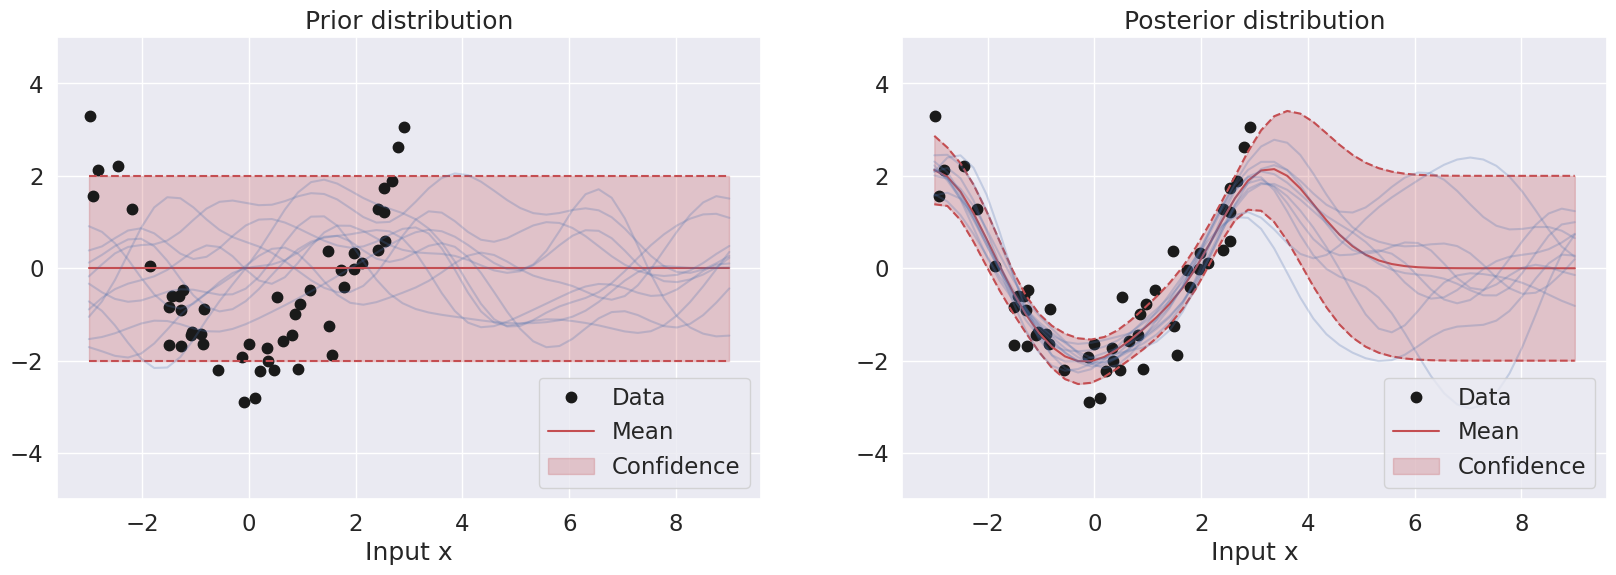

In [30]:
def plot_with_uncertainty(Xp, mu, Sigma, color='r', color_samples='b', title="", num_samples=0):
    
    mean, std = mu.ravel(), np.sqrt(np.diag(Sigma))

    
    # plot distribution
    plt.plot(Xp, mean, color=color, label='Mean')
    plt.plot(Xp, mean + 2*std, color=color, linestyle='--')
    plt.plot(Xp, mean - 2*std, color=color, linestyle='--')
    plt.fill_between(Xp.ravel(), mean - 2*std, mean + 2*std, color=color, alpha=0.25, label='Confidence')
    
    # generate samples
    if num_samples > 0:
        fs = generate_samples(mu, Sigma, 10)
        plt.plot(Xp, fs, color=color_samples, alpha=.25)
    
    plt.title(title)
    
def plot_data():
    plt.plot(X, y, 'k.', markersize=15, label='Data')
    plt.xlabel('Input x')
    plt.ylim((-5, 5))
    plt.grid(True)

    
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plot_data()
plot_with_uncertainty(Xp, mu_prior, Sigma_prior, title='Prior distribution', num_samples=10)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plot_data()
plot_with_uncertainty(Xp, mu_post, Sigma_post, title='Posterior distribution', num_samples=10)
plt.legend(loc='lower right')

print(mu_prior.shape)
print(mu_post.shape)
print(Sigma_prior.shape)
print(Sigma_post.shape)

Explain what you see in the two figures?

In the first figure, the prior mean is 0, and the prior variance is based on rbf of the testing data. The mean is set at 0 and the confidence level is within the [-2,2] range along the response. This prior is uniformly distributed

In the second figure, the posterior mean follows closely the data pattern from -4 to 4 along the x-input. After that, the posterior starts to resemble the prior again. 

What is the difference between the prior and the posterior in 

1) regions close to the data points 

The prior is uniform in this region because it does not consider the datapoints.

The posterior takes into account this region and it closely follows the datapoints.

2) in regions far from the data points?

There is no difference between the prior and posterior in regions far from the data points.

**Task 3d**: Replicate the two figures above for the following three different values of the scale parameter: $\left\lbrace 0.1, 1., 10 \right\rbrace$ and for $\sigma^2 = \frac{1}{2}$ and $\alpha=1$. Explain the differences between the three sets of plots


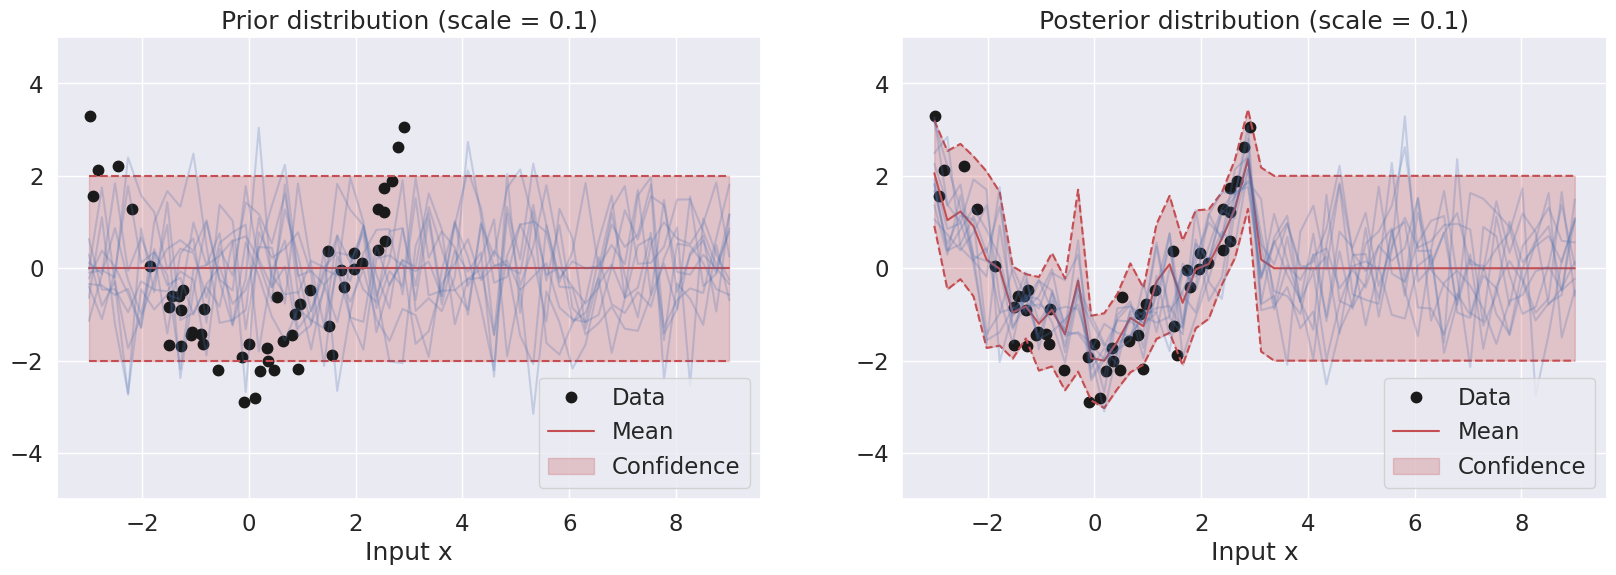

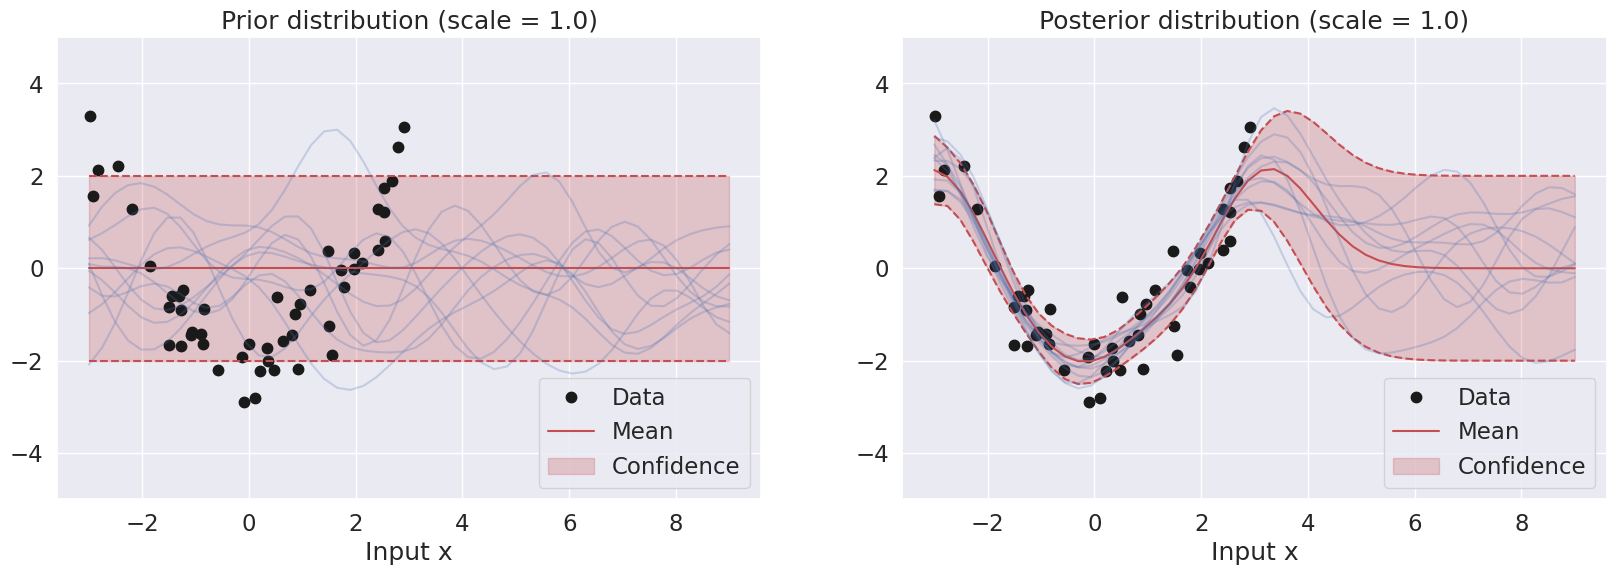

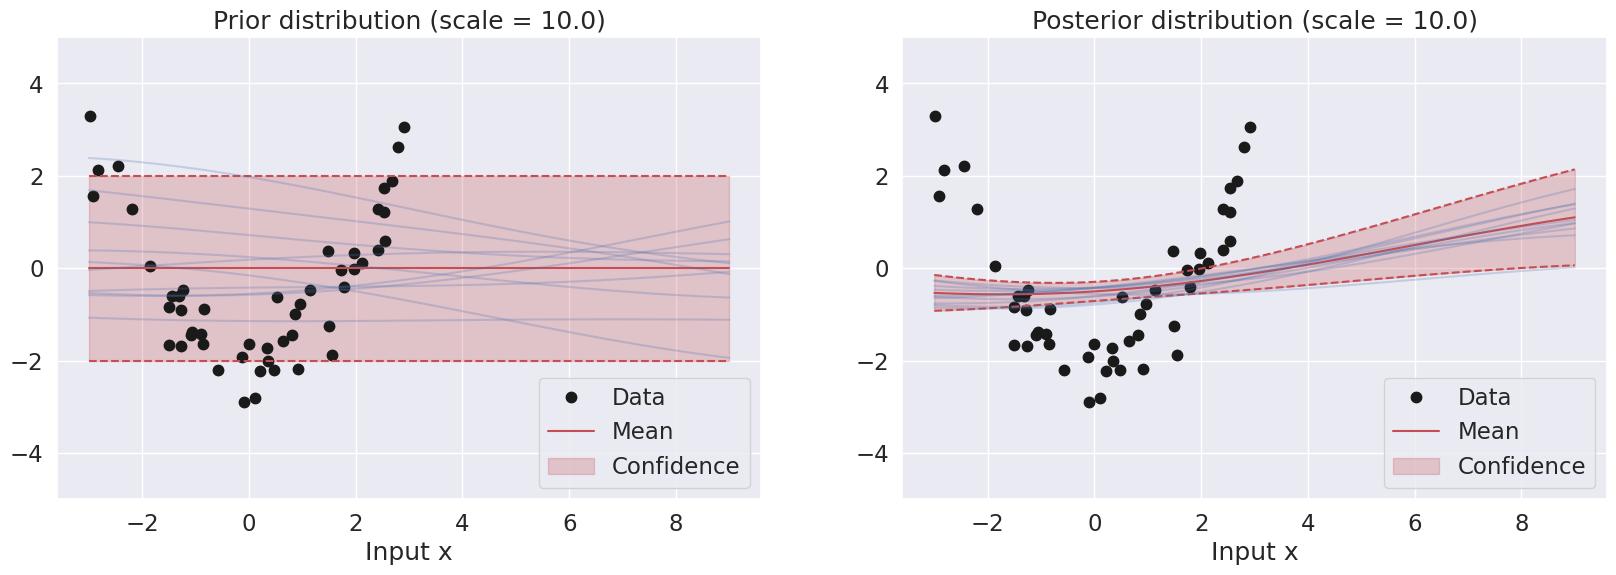

In [31]:
sigma2=0.5
alpha=1
scales = [0.1, 1., 10.]

###############################################
# ------- insert code here -------------------
###############################################



**Task 3e**: Replicate the two figures above for the following three different values of the alpha parameter: $\left\lbrace 0.25, 1, 5 \right\rbrace$ and for $\sigma^2 = \frac{1}{2}$ and $\text{scale}=1$. Explain the differences between the three sets of plots


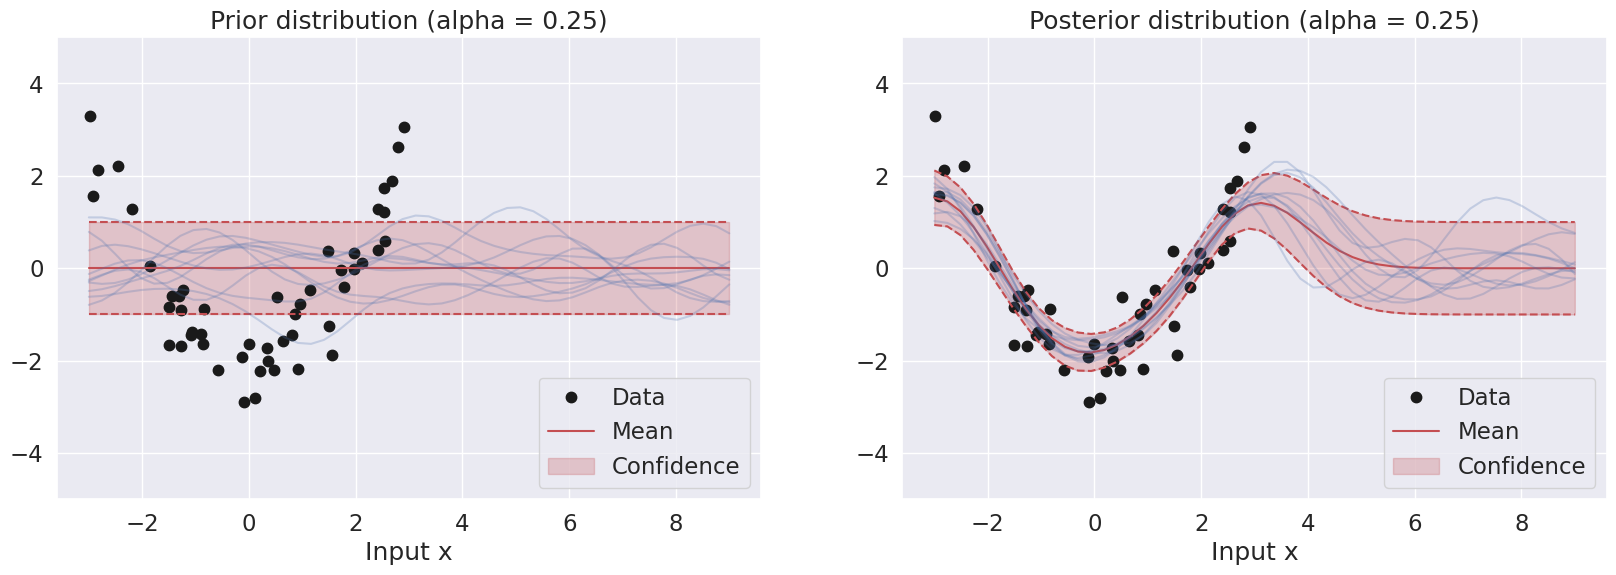

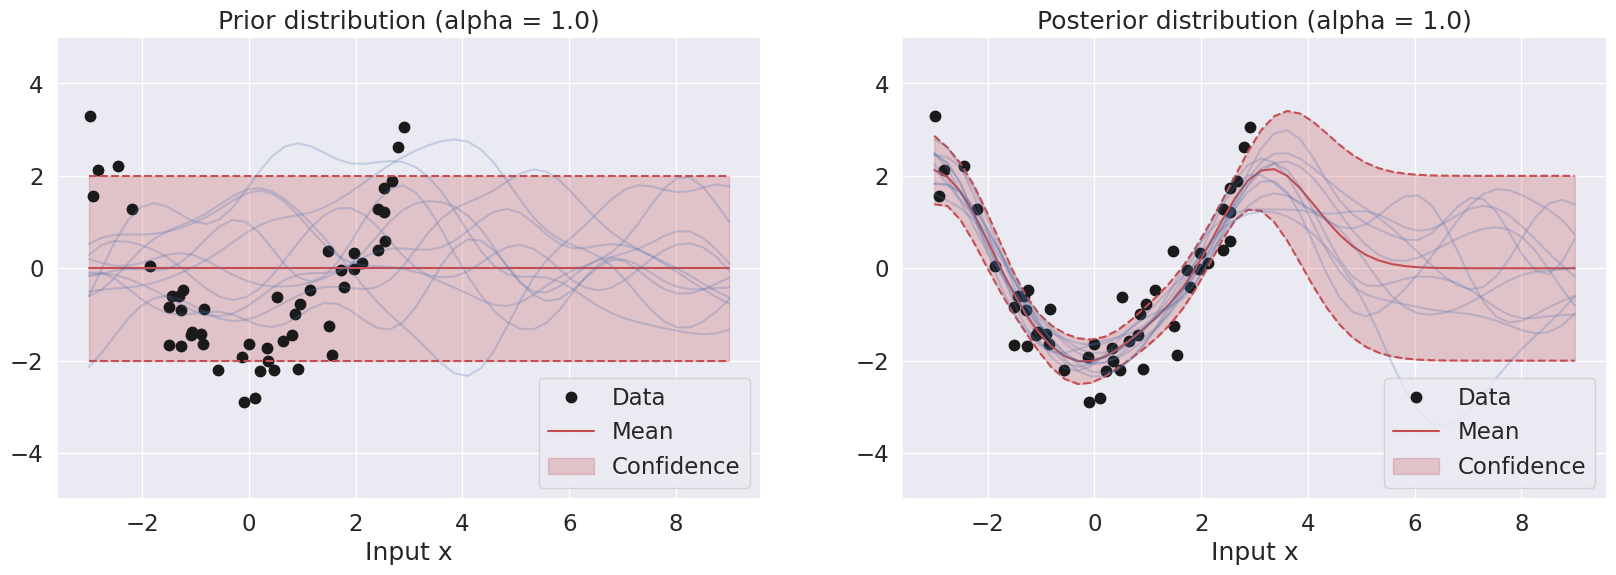

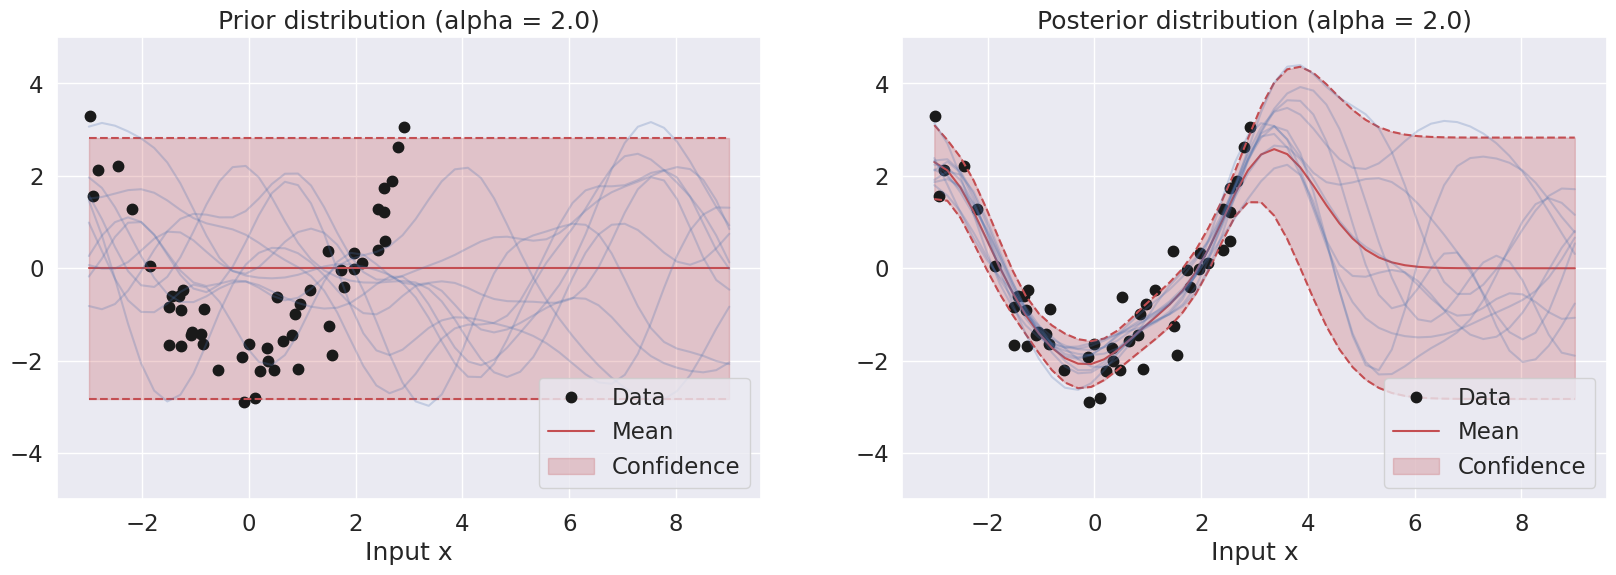

In [32]:
sigma2=0.5
scale=1
alphas = [0.25, 1., 2.]



for alpha in alphas:
    ###############################################
    # ------- insert code here -------------------
    ###############################################
    
    plt.figure(figsize=(20, 6))

    plt.subplot(1, 2, 1)
    plot_data()
    plot_with_uncertainty(Xp, mu_prior, Sigma_prior, title=f'Prior distribution (alpha = {alpha})', num_samples=10)
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plot_data()
    plot_with_uncertainty(Xp, mu_post, Sigma_post, title=f'Posterior distribution (alpha = {alpha})', num_samples=10)
    plt.legend(loc='lower right')